### Testing Hybrid capture baits across Crop Wild relatives.

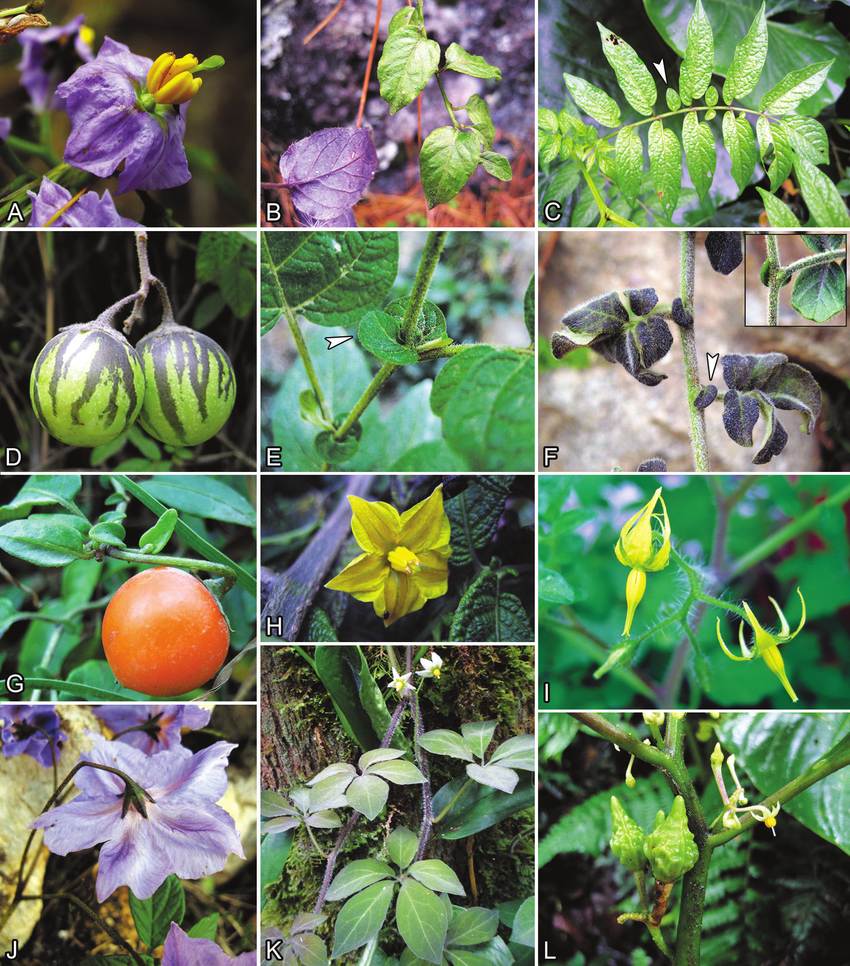

In [ ]:
The genus Solanum includes potato, tomato, aubergine

In [ ]:
Solmac3_v2.0.fasta - S. macrocarpon
Solaet3_v2.0.fasta - S. aethiopicum
Solpri1_v1.0.fasta - S. prinophyllum
Solqui2_v1.0.fasta - S. quitoense
Solabu2_v1.0.fasta - S. abutiloides

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Work with just v5 baits.

In [136]:
v5=pd.read_csv("bait_capture.txt",sep='\t')

In [137]:
v5['log_reads'] = np.log(v5['numreads']+1)

In [138]:
v5.head(3)

,sample,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,log_reads
0,aubergine,H12@DN1054_c2_g1_i3.p1,1,1308,81,1137,86.9266,8.265290,28.9,27.2,4.406719
1,aubergine,H12@DN1656_c0_g2_i1.p1,1,795,29,582,73.2075,4.628930,28.7,28.9,3.401197
2,aubergine,H12@DN18954_c0_g1_i6.p1,1,2478,4,325,13.1154,0.242131,29.9,1.0,1.609438


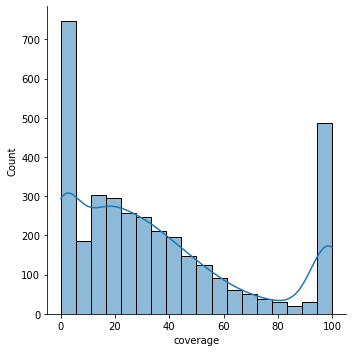

In [143]:
sns.displot(data=v5, x="coverage", kde=True)

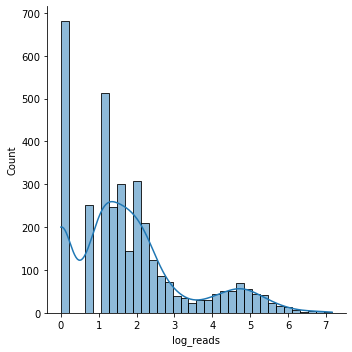

In [144]:
sns.displot(data=v5, x="log_reads", kde=True)

Lots of bad coverage and reads, some very high.  Breakdown by genome

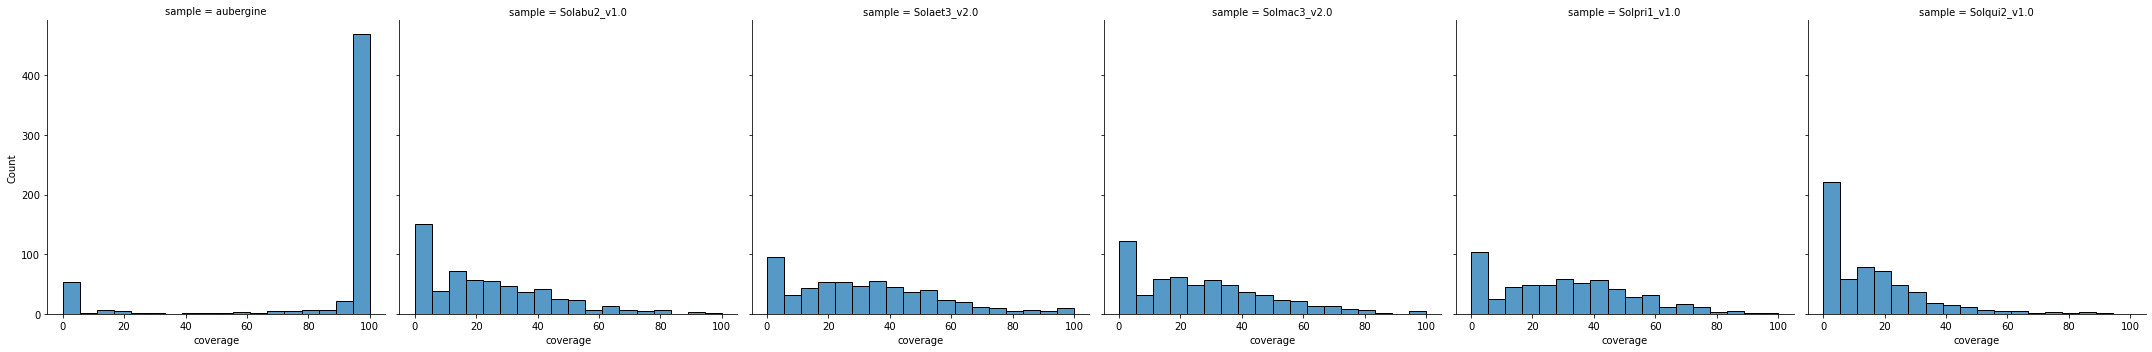

In [142]:
sns.displot(data=v5, x="coverage",  col='sample')

In [141]:
v5.groupby("sample")["log_reads"].max()

sample
Solabu2_v1.0    7.164720
Solaet3_v2.0    7.154615
Solmac3_v2.0    6.965080
Solpri1_v1.0    6.787845
Solqui2_v1.0    6.102559
aubergine       6.910751
Name: log_reads, dtype: float64

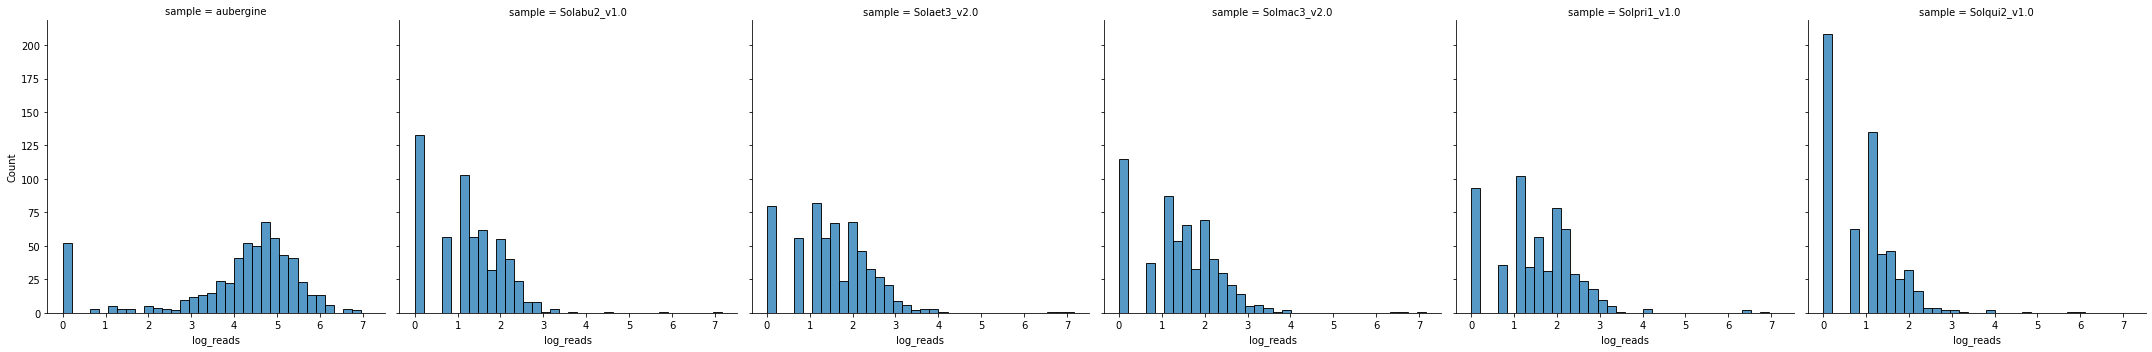

In [140]:
sns.displot(data=v5, x="log_reads",  col='sample')

In [98]:
df = v5.pivot(index='#rname', columns='sample', values=["log_reads"])
reads = df['log_reads']

In [99]:
reads.head(3)

sample,Solabu2_v1.0,Solaet3_v2.0,Solmac3_v2.0,Solpri1_v1.0,Solqui2_v1.0,aubergine
#rname,,,,,,
H12@DN1054_c2_g1_i3.p1,1.609438,1.098612,1.098612,0.000000,0.000000,4.406719
H12@DN11013_c0_g1_i2.p1,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000
H12@DN1656_c0_g2_i1.p1,1.386294,0.693147,1.386294,1.098612,1.609438,3.401197


In [106]:
reads.describe()

sample,Solabu2_v1.0,Solaet3_v2.0,Solmac3_v2.0,Solpri1_v1.0,Solqui2_v1.0,aubergine
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,1.231164,1.550985,1.426823,1.525049,0.903973,4.084829
std,0.894752,0.970576,0.977155,0.956775,0.850144,1.591370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.693147,1.098612,0.693147,1.098612,0.000000,3.737670
50%,1.386294,1.609438,1.609438,1.609438,1.098612,4.553877
75%,1.791759,2.197225,2.079442,2.197225,1.386294,5.053051
max,7.164720,7.154615,6.965080,6.787845,6.102559,6.910751


Are the same baits 'capturing' many reads in from different genomes?

Make a new column for 'high in aubergine' to allow colouring of graph

In [108]:
reads['High_aub'] = ['High' if x > 5 else 'Normal' for x in reads['aubergine']]

In [109]:
reads.head(3)

sample,Solabu2_v1.0,Solaet3_v2.0,Solmac3_v2.0,Solpri1_v1.0,Solqui2_v1.0,aubergine,High_aub
#rname,,,,,,,
H12@DN1054_c2_g1_i3.p1,1.609438,1.098612,1.098612,0.000000,0.000000,4.406719,Normal
H12@DN11013_c0_g1_i2.p1,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,Normal
H12@DN1656_c0_g2_i1.p1,1.386294,0.693147,1.386294,1.098612,1.609438,3.401197,Normal


In [119]:
df = v5.pivot(index='#rname', columns='sample', values=["coverage"])
cover = df['coverage'] 
cover['Poor_aub']= ['Poor' if x < 90 else 'Normal' for x in cover['aubergine']]

/var/folders/8k/5wbyxggs1q1856w27fftzywh0000gp/T/ipykernel_40328/4008857380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cover['Poor_aub']= ['Poor' if x < 90 else 'Normal' for x in cover['aubergine']]


In [120]:
cover.head(3)

sample,Solabu2_v1.0,Solaet3_v2.0,Solmac3_v2.0,Solpri1_v1.0,Solqui2_v1.0,aubergine,Poor_aub
#rname,,,,,,,
H12@DN1054_c2_g1_i3.p1,15.9786,7.49235,11.9266,0.0000,0.000,86.9266,Poor
H12@DN11013_c0_g1_i2.p1,21.7155,0.00000,0.0000,0.0000,0.000,0.0000,Poor
H12@DN1656_c0_g2_i1.p1,40.5031,9.05660,23.0189,33.8365,45.283,73.2075,Poor


### log Number of reads per bait per genome

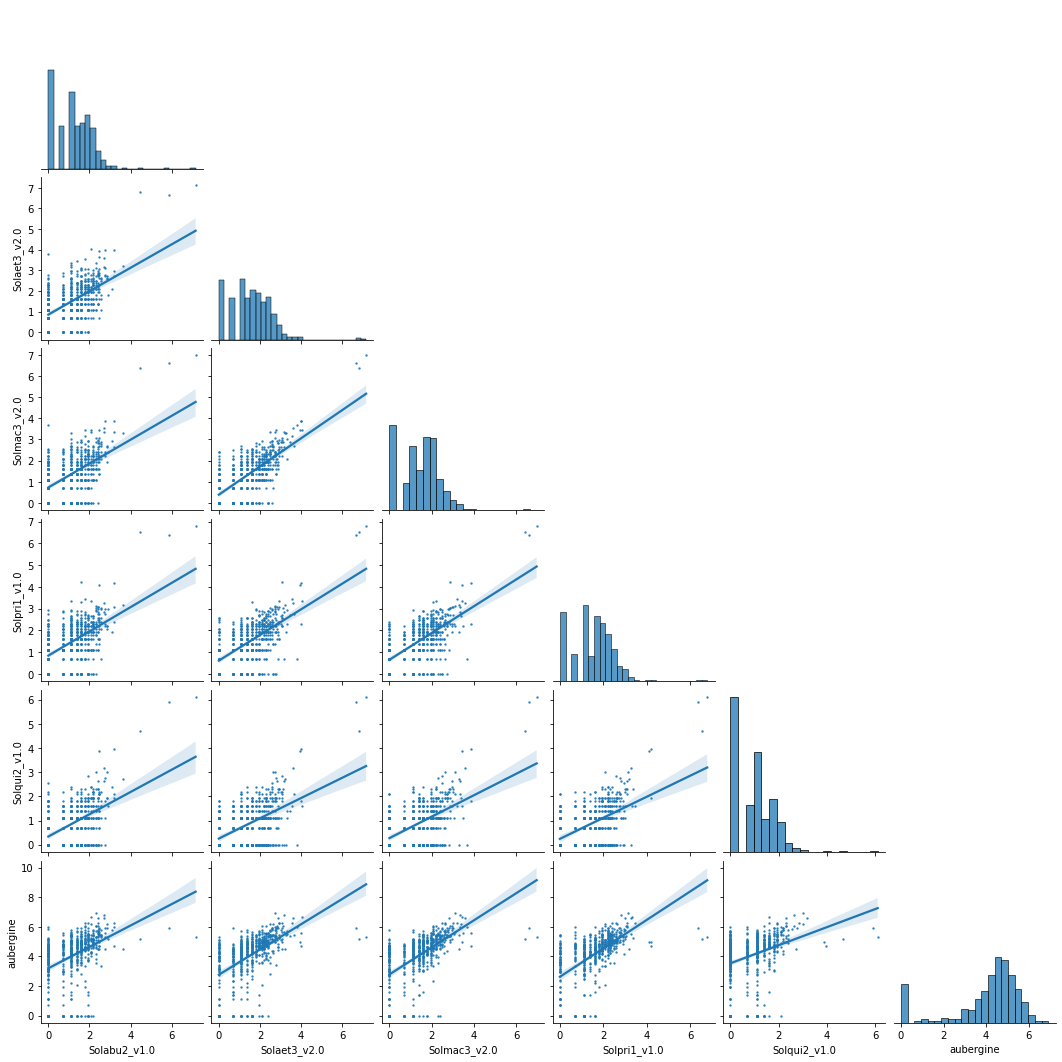

In [127]:
sns.pairplot(data=reads, kind="reg",corner=True,plot_kws=dict(scatter_kws=dict(s=2)))

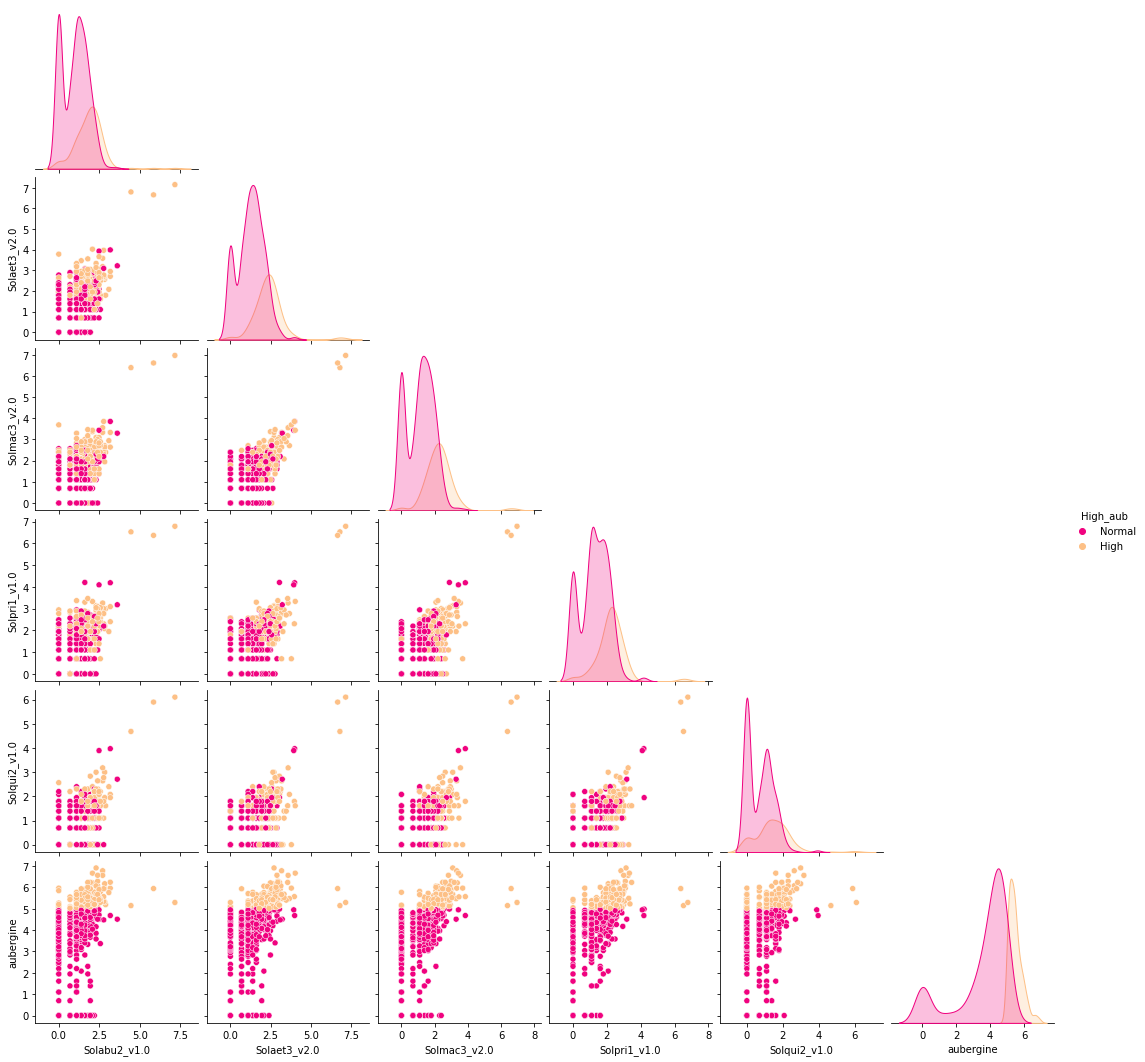

In [135]:
sns.pairplot(data=reads, hue = "High_aub", corner=True, palette="Accent_r")

Look to be 3 really poor baits - high reads in all, but rest vary by genome.  
Which are the three outliers?  

In [145]:
reads['Solabu2_v1.0'].nlargest(3)

#rname
SMEL4.1_05g015690.1.01    7.164720
SMEL4.1_10g008630.1.01    5.846439
SMEL4.1_03g004420.1.01    4.454347
Name: Solabu2_v1.0, dtype: float64

In [146]:
reads['Solaet3_v2.0'].nlargest(3)

#rname
SMEL4.1_05g015690.1.01    7.154615
SMEL4.1_03g004420.1.01    6.799056
SMEL4.1_10g008630.1.01    6.658011
Name: Solaet3_v2.0, dtype: float64

In [147]:
reads['Solmac3_v2.0'].nlargest(3)

#rname
SMEL4.1_05g015690.1.01    6.965080
SMEL4.1_10g008630.1.01    6.609349
SMEL4.1_03g004420.1.01    6.390241
Name: Solmac3_v2.0, dtype: float64

### Coverage per bait per genome

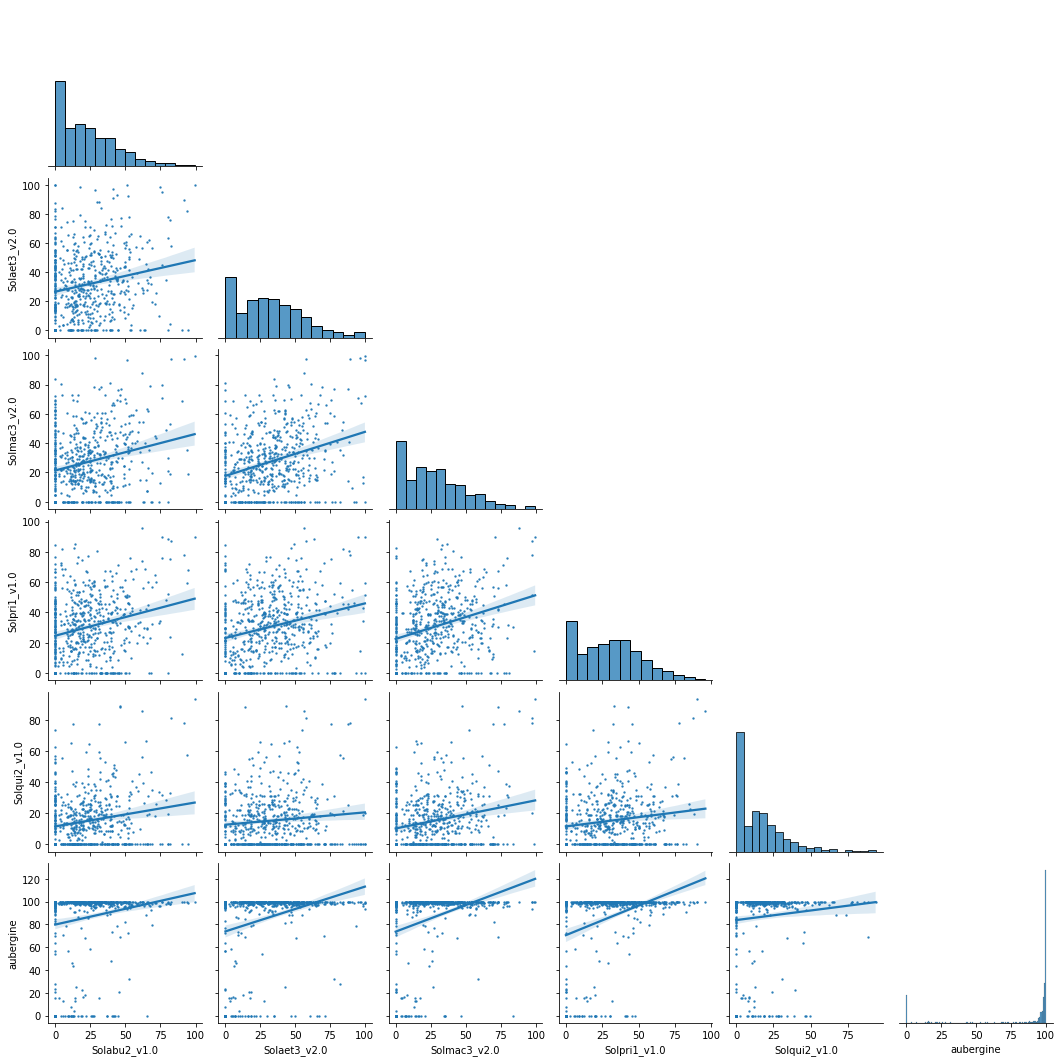

In [133]:
sns.pairplot(data=cover, kind="reg",corner=True,plot_kws=dict(scatter_kws=dict(s=2)))

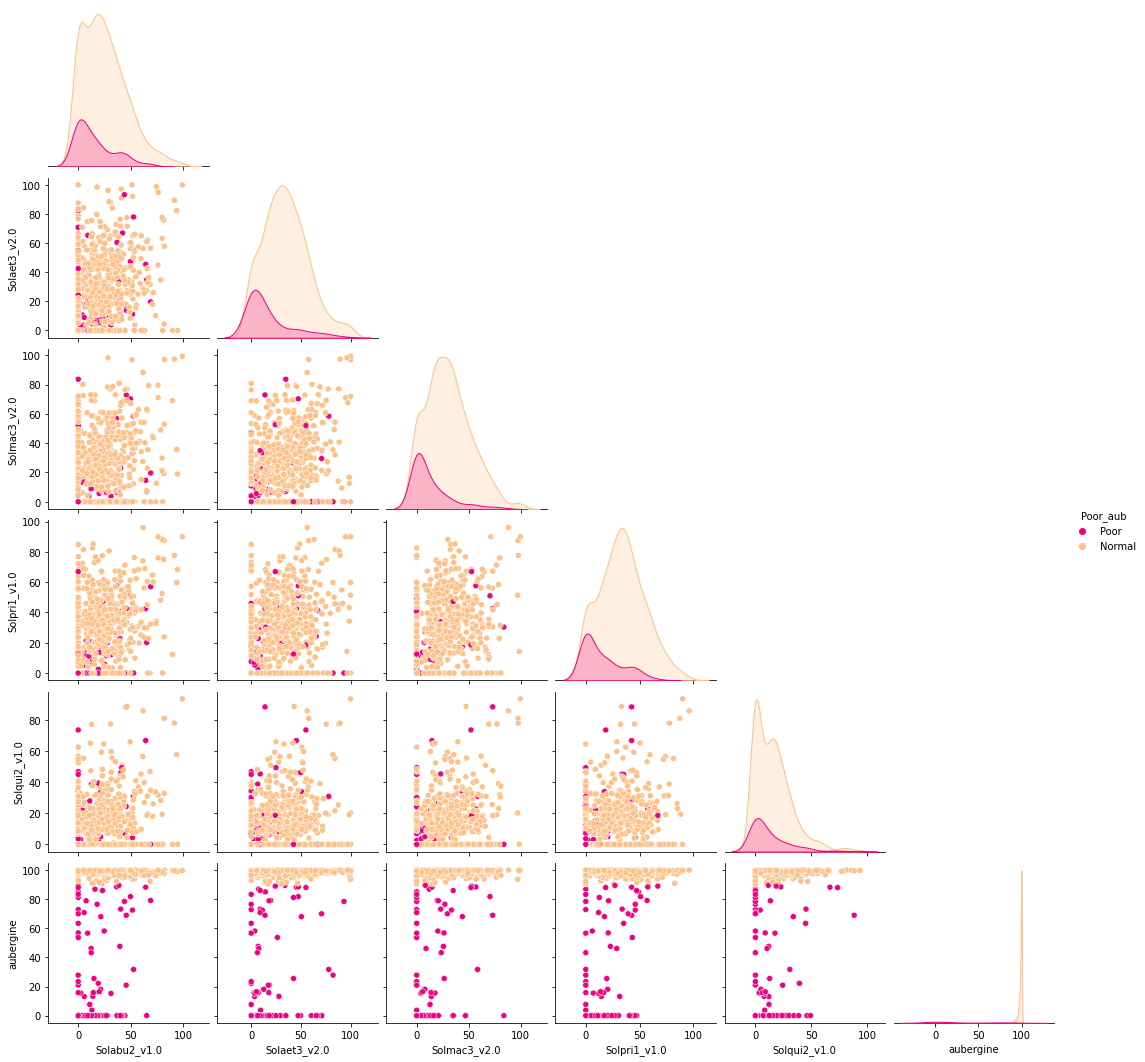

In [132]:
sns.pairplot(data=cover, hue = "Poor_aub",corner=True, palette="Accent_r")

Very mixed.  No clear poor in all here.